## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
>
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets





In [ ]:
# medical charge bill

medical_bill_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_bill_url, 'medical_charge.csv')

('medical_charge.csv', <http.client.HTTPMessage at 0x7eba289e9510>)

In [ ]:
import pandas as pd

medical_df = pd.read_csv('medical_charge.csv')

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exoloratory Analysis and visualization

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Below paramenter improve the default style and font sise for our chart

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_df, x = 'age', marginal = 'box', nbins = 47, title = "Distribution of age")
fig.update_layout(bargap = 0.5)
fig.show()

### Body Mass Index

In [ ]:
fig = px.histogram(medical_df, x = 'bmi', marginal = 'box', color_discrete_sequence=['Red'], title = "Distribution of BMI")
fig.update_layout(bargap = 0.2)
fig.show()

### Charges

In [ ]:
fig = px.histogram(medical_df, x = 'charges', marginal = 'box',color = 'smoker', color_discrete_sequence=['green', 'grey'], title = "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
## Annual cahrges in relation with sex
fig = px.histogram(medical_df, x = 'charges', marginal = 'box',color = 'sex', color_discrete_sequence=['green', 'blue'], title = "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
### cahrges in realtion with region
fig = px.histogram(medical_df, x = 'charges', marginal = 'box',color = 'region', color_discrete_sequence=['green', 'grey', 'blue', 'red'], title = "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
### cahrges in relation with children
fig = px.histogram(medical_df, x = 'charges', marginal = 'box',color = 'children', color_discrete_sequence=['green', 'grey','blue', 'black', 'red','yellow'], title = "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

### Smoker

In [ ]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
# relation between smoker and sex of the population

px.histogram(medical_df, x = 'smoker', color = 'sex', title = "Smoker")


### Relation between Age and Charges

In [ ]:
fig = px.scatter(medical_df, x = 'age', y = 'charges',
                 color = 'smoker', opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'Age vs Charges')

fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
# BMI vs Charge with smokers value
fig = px.scatter(medical_df, x = 'bmi', y = 'charges',
                 color = 'smoker', opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'Age vs Charges')

fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
px.violin(medical_df, x = 'children', y = 'charges')

In [ ]:
# Correlation between charges and BMI
print("Correlation between Medical  charges and BMI :",medical_df.charges.corr(medical_df.bmi))


Correlation between Medical  charges and BMI : 0.19834096883362895


In [ ]:
# correlation between charges and ages
print("Correlation between Medical  charges and ages :",medical_df.charges.corr(medical_df.age))

Correlation between Medical  charges and ages : 0.2990081933306476


In [ ]:
# Correlation between charges and smokers

smoker_value = {'yes' : 1, 'no':0}
smoker_num = medical_df.smoker.map(smoker_value)
print("Correlation between Medical charges and smokers :",medical_df.charges.corr(smoker_num))

Correlation between Medical charges and smokers : 0.787251430498478


In [ ]:
medical_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
medical_df_copy = medical_df.copy()

In [ ]:
medical_df_copy['sex'] = medical_df_copy['sex'].map({'female':0, 'male':1 })

In [ ]:
medical_df_copy['smoker'] = medical_df_copy['smoker'].map({'no':0, 'yes':1 })

In [ ]:
medical_df_copy['region'] = medical_df_copy['region'].map({'southwest': 1,'southeast': 2,'northwest':3, 'northeast':4 })

In [ ]:
medical_df_copy.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Text(0.5, 1.0, 'Correlation Matrix ')

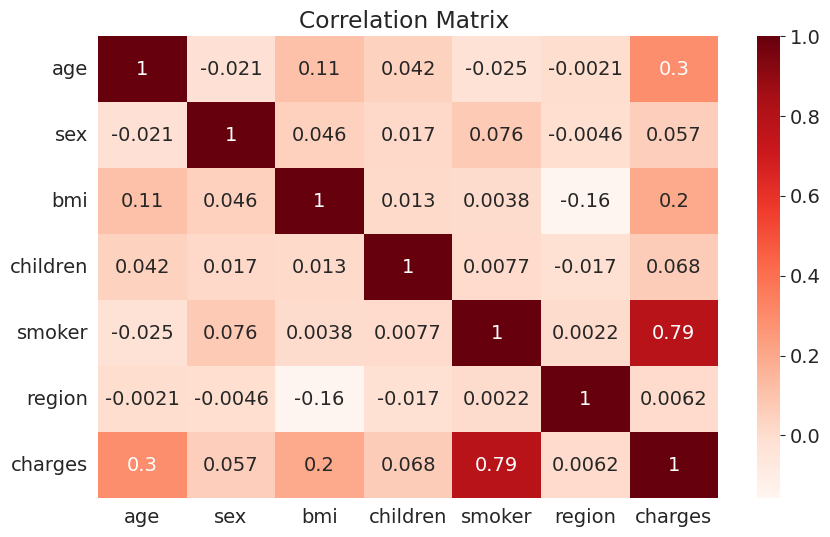

In [ ]:
sns.heatmap(medical_df_copy.corr(), cmap = 'Reds', annot = True)
plt.title("Correlation Matrix ")

# Linear regression using single feature

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

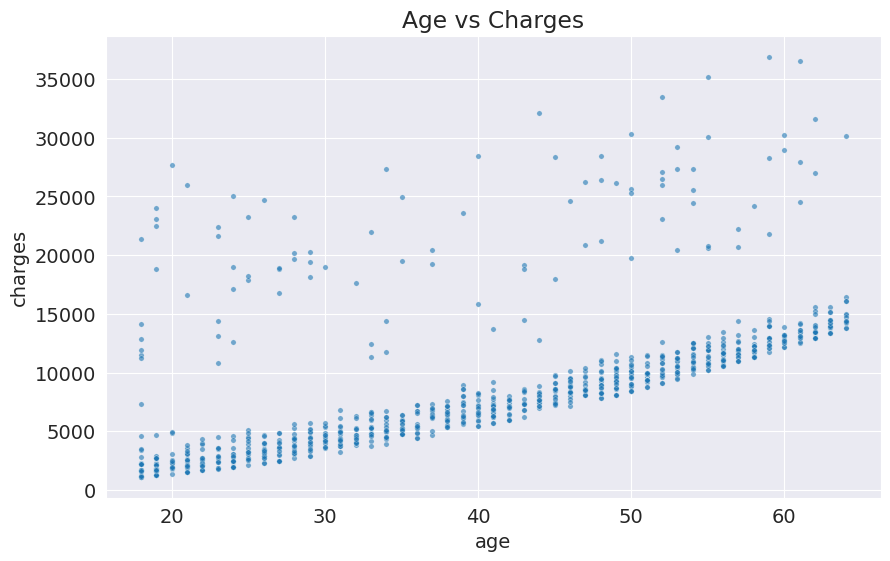

In [ ]:
plt.title('Age vs Charges')
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.6, s = 15)

In [ ]:
# as a we are going to implement the straight line equation i.e., charge = w * age + b
# by helper function

def estimate_charges(w, b, age):
    return w * age + b

In [ ]:
# let guess the w and b for our first model
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(w, b, ages)

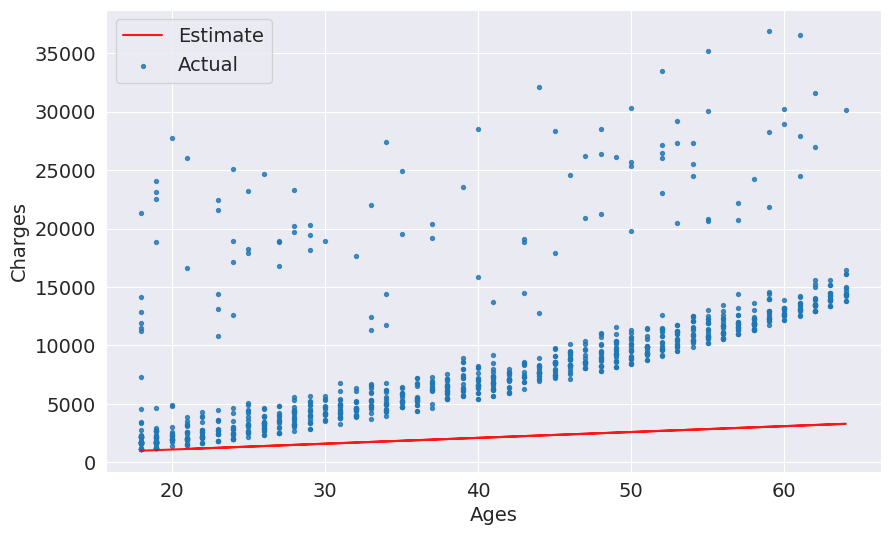

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

Here we can see that for the particular 'w' and 'b' value out model is not performing well, so have to change the value of 'w' and 'b' to get the desired result

In [ ]:
def try_parameter(w, b):
    ages = non_smoker_df.age
    estimated_charges = estimate_charges(w, b, ages)
    target = non_smoker_df.charges

    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

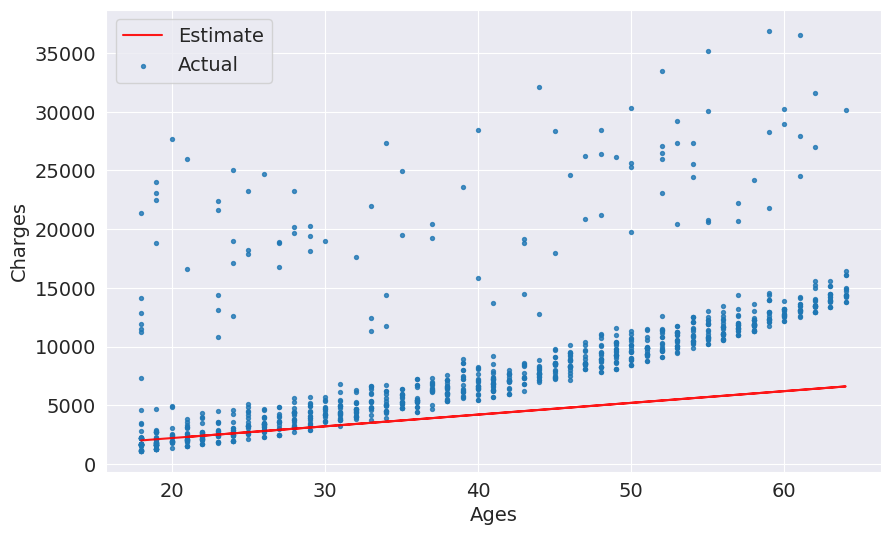

In [ ]:
try_parameter(100,200)

In [ ]:
import numpy as np

In [ ]:
def rmse(target, prediction):
    return (np.sqrt(np.mean(np.square(target - prediction))))

In [ ]:
w = 100
b = 200

In [ ]:
target = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
def try_parameter(w, b):
    ages = non_smoker_df.age
    predicted = estimate_charges(w, b, ages)
    target = non_smoker_df.charges

    plt.plot(ages, predicted, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    loss = rmse(target, predicted)
    print('Loss : ',loss)

Loss :  4861.600193758335


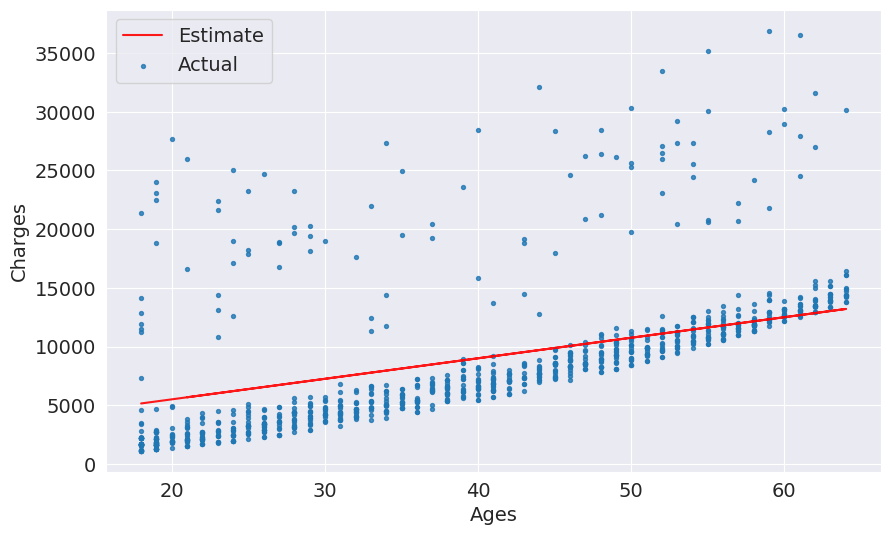

In [ ]:
try_parameter(175, 2000)

# Linear regression using scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
help(regressor.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
X = non_smoker_df[['age']]
y = non_smoker_df.charges

In [ ]:
X.shape

(1064, 1)

In [ ]:
y.shape

(1064,)

In [ ]:
regressor.fit(X, y)

LinearRegression()

In [ ]:
regressor.predict([[23],[37],[61]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
pred = regressor.predict(X)

In [ ]:
pred

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(y, pred)

4662.505766636395

In [ ]:
regressor.coef_

array([267.24891283])

In [ ]:
regressor.intercept_

-2091.4205565650864

Loss :  4662.505766636395


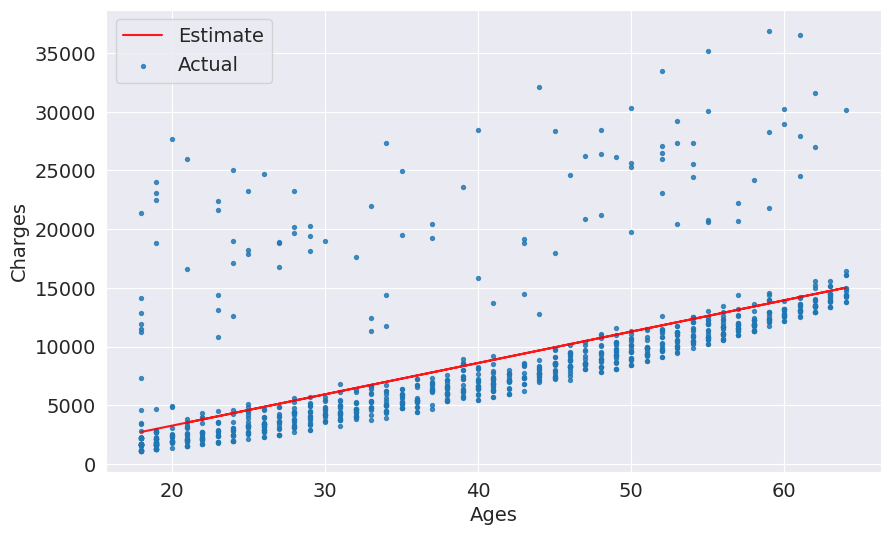

In [ ]:
try_parameter(regressor.coef_, regressor.intercept_)

* # SDGRegression implementation on single feature

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
sdgr = SGDRegressor()

In [ ]:
X = non_smoker_df[['age']]
y = non_smoker_df.charges

In [ ]:
sdgr.fit(X, y)

SGDRegressor()

In [ ]:
sdgr.predict([[23],[37],[61]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 2452.2151946 ,  6291.27289144, 12872.51465744])

In [ ]:
pred = sdgr.predict(X)

In [ ]:
pred

array([1081.12316002, 3823.30722918, 5194.39926377, ..., 1081.12316002,
       1081.12316002, 1903.77838077])

In [ ]:
rmse(y, pred)

4895.445208977334

In [ ]:
sdgr.coef_

array([274.21840692])

In [ ]:
sdgr.intercept_

array([-3854.80816448])

Loss :  4895.445208977334


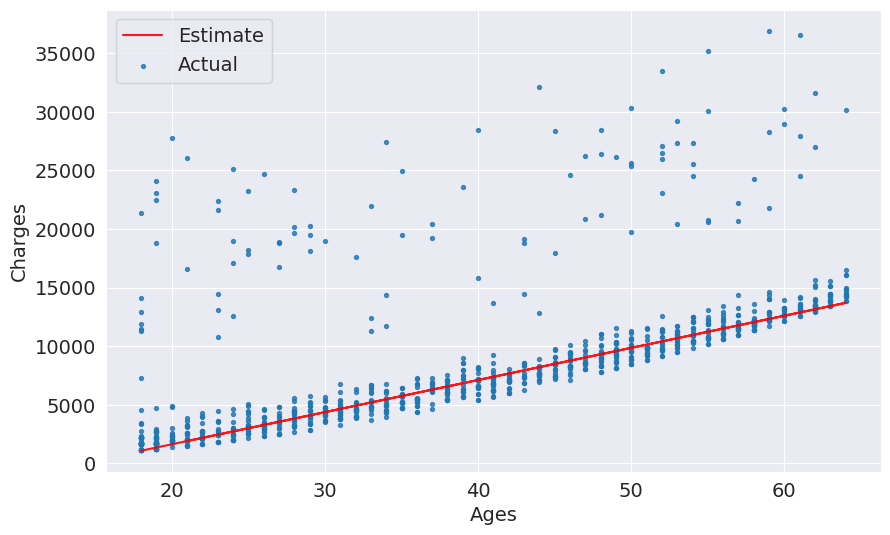

In [ ]:
try_parameter(sdgr.coef_, sdgr.intercept_)

> From Above model i.e., Linear regression RMSE = 4662.5 and SDGRegressor RMSE = 4705.8
> By this we can say that Linear Regression perform better than SDGRegressor for single feature.

# Linear regression on feature smoker and charges

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

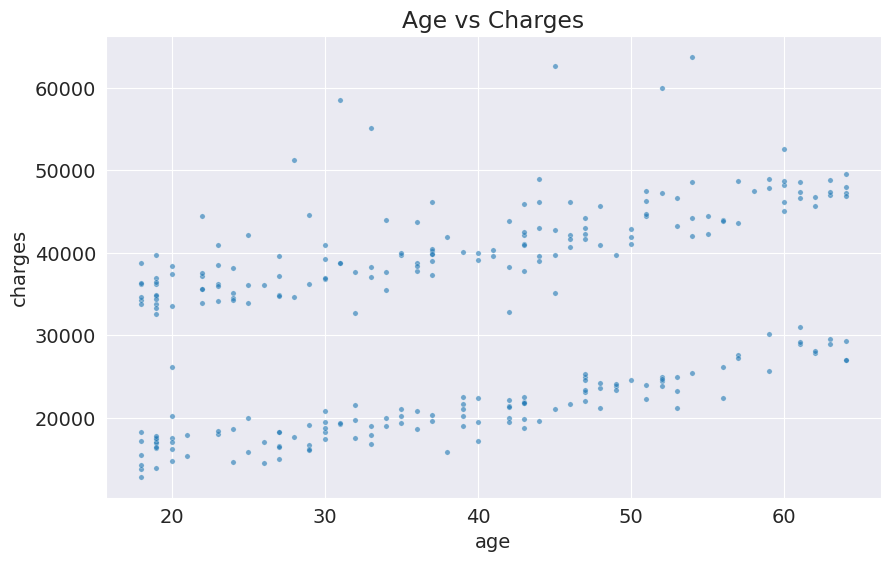

In [ ]:
plt.title('Age vs Charges')
sns.scatterplot(data = smoker_df, x = 'age', y = 'charges', alpha = 0.6, s = 15)

In [ ]:
# as a we are going to implement the straight line equation i.e., charge = w * age + b
# by helper function

def est_charges(w, b, age):
    return w * age + b

In [ ]:
w = 500
b = 1000

ages = smoker_df.age
estimated_charges = est_charges(w, b, ages)

Text(0, 0.5, 'Estimated Charges')

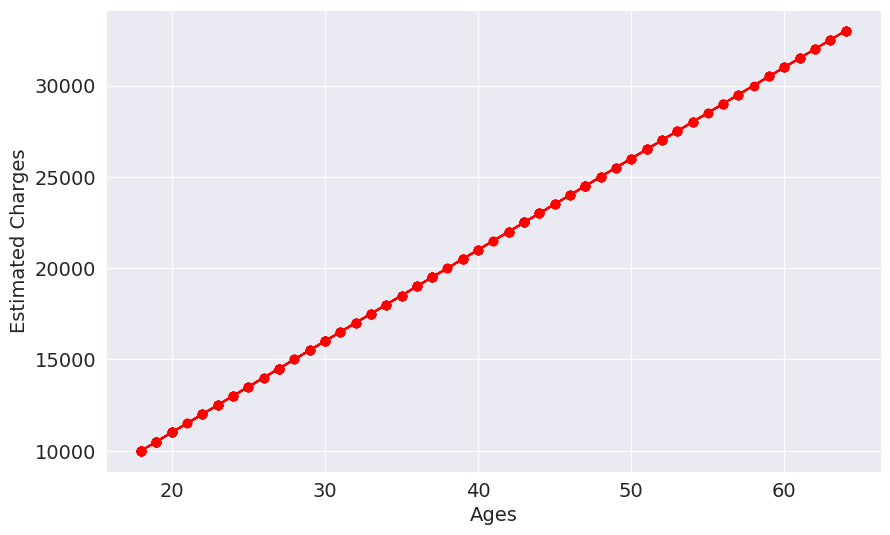

In [ ]:
plt.plot(ages, estimated_charges,'r-o')
plt.xlabel('Ages')
plt.ylabel("Estimated Charges")

In [ ]:
def try_parameter(w, b):
    ages = smoker_df.age
    predicted = est_charges(w, b, ages)
    target = smoker_df.charges

    plt.plot(ages, predicted, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    loss = rmse(target, predicted)
    print('Loss : ',loss)

Loss :  32074.58722734571


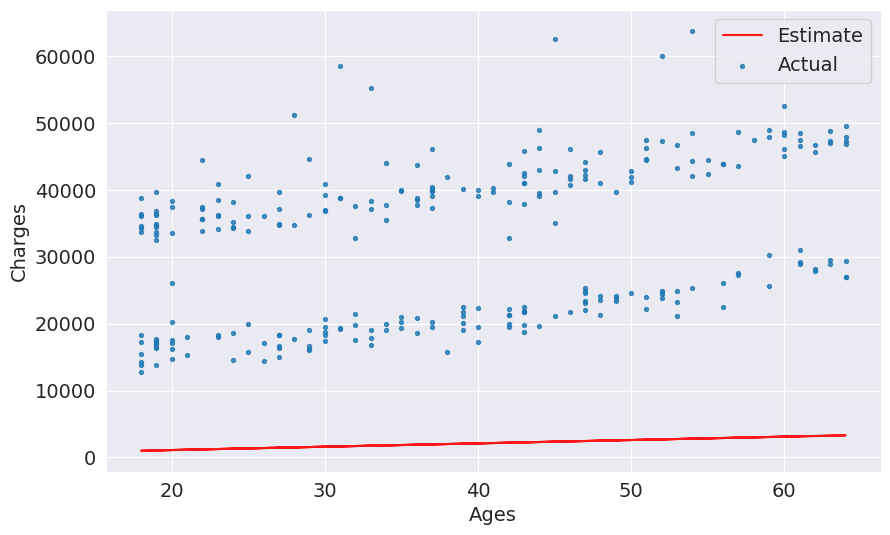

In [ ]:
try_parameter(50,100)

In [ ]:
## Linear Regression Implementation

from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
X = smoker_df[['age']]
y = smoker_df.charges

In [ ]:
reg.fit(X, y)

LinearRegression()

In [ ]:
reg.predict([[23],[37],[61]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 31587.91940498, 38913.62185562])

In [ ]:
predicted = reg.predict(X)

In [ ]:
rmse(y, predicted)

10711.00334810241

In [ ]:
reg.coef_

array([305.23760211])

In [ ]:
reg.intercept_

20294.128126915966

Loss :  10711.00334810241


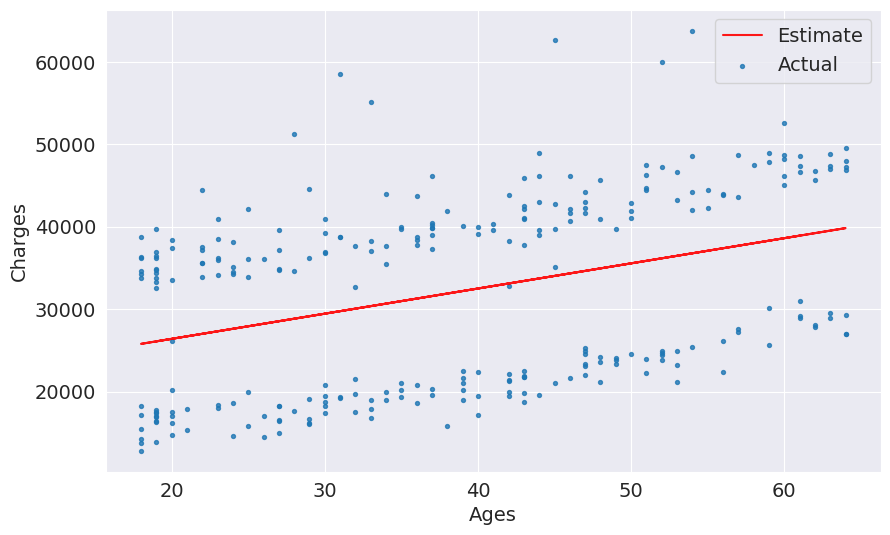

In [ ]:
try_parameter(reg.coef_, reg.intercept_)

### Linear Regression using multiple feature

> charges = w1 * age + w2 * bmi + b

In [ ]:
X = non_smoker_df[['age']]
y = non_smoker_df['charges']

model = LinearRegression()
model.fit(X,y)

prediction = model.predict(X)
loss = rmse(y, prediction)

print("Loss : ", loss)

Loss :  4662.505766636395


In [ ]:
# Multiple feature included

X = non_smoker_df[['age', 'bmi']]
y = non_smoker_df['charges']

model = LinearRegression()
model.fit(X,y)

prediction = model.predict(X)
loss = rmse(y, prediction)

print("Loss : ", loss)

Loss :  4662.3128354612945


In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [ ]:
fig = px.scatter(non_smoker_df, x = 'bmi', y = 'charges', title = 'BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
# Visualize 3 feature at the same time

fig = px.scatter_3d(non_smoker_df, x = 'bmi', y = 'age', z = 'charges', title = 'BMI vs Age vs Charges')
fig.update_traces(marker_size = 5, marker_opacity = 0.5)
fig.show()

In [ ]:
# check the coeffiecient and intercept

model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [ ]:
non_smoker_df.children.corr(non_smoker_df.charges)

0.13892870453542194

In [ ]:
fig = px.scatter(non_smoker_df, x = 'children', y = 'charges', title = 'BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
# Multiple feature included

X = non_smoker_df[['age', 'bmi', 'children']]
y = non_smoker_df['charges']

model = LinearRegression()
model.fit(X,y)

prediction = model.predict(X)
loss = rmse(y, prediction)

print("Loss : ", loss)

Loss :  4608.470405038247


In [ ]:
# Multiple feature included

X = medical_df[['age', 'bmi']]
y = medical_df['charges']

model = LinearRegression()
model.fit(X,y)

prediction = model.predict(X)
loss = rmse(y, prediction)

print("Loss : ", loss)

Loss :  11374.110466839007


In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
X = medical_df[['age', 'bmi', 'children', 'smoker_code']]
y = medical_df['charges']

model = LinearRegression()
model.fit(X,y)

prediction = model.predict(X)
loss = rmse(y, prediction)

print("Loss : ", loss)

Loss :  6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

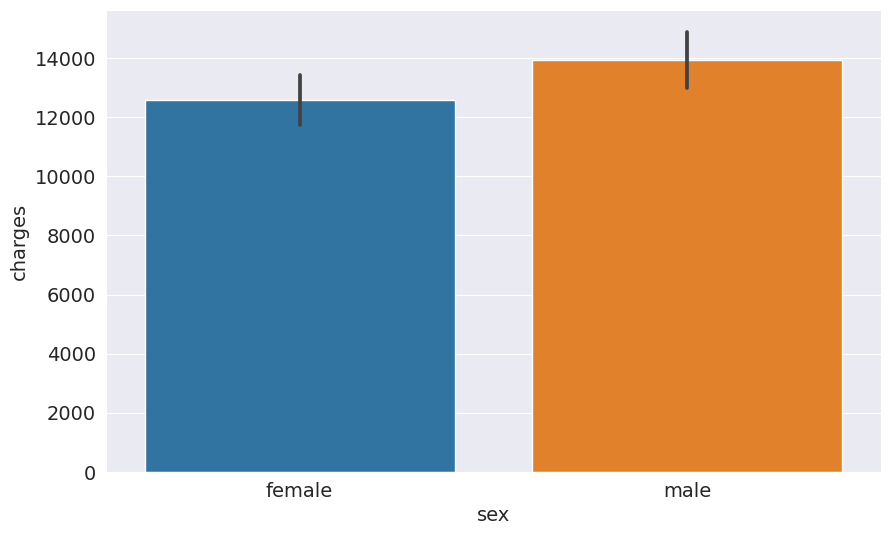

In [ ]:
sns.barplot(medical_df, x = 'sex', y = 'charges')

In [ ]:
sex_code = {'male': 1, 'female': 0}
medical_df['sex_code'] = medical_df.sex.map(sex_code)

In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [ ]:
X = medical_df[['age', 'bmi','sex_code', 'children', 'smoker_code']]
y = medical_df['charges']

model = LinearRegression()
model.fit(X,y)

prediction = model.predict(X)
loss = rmse(y, prediction)

print("Loss : ", loss)

Loss :  6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

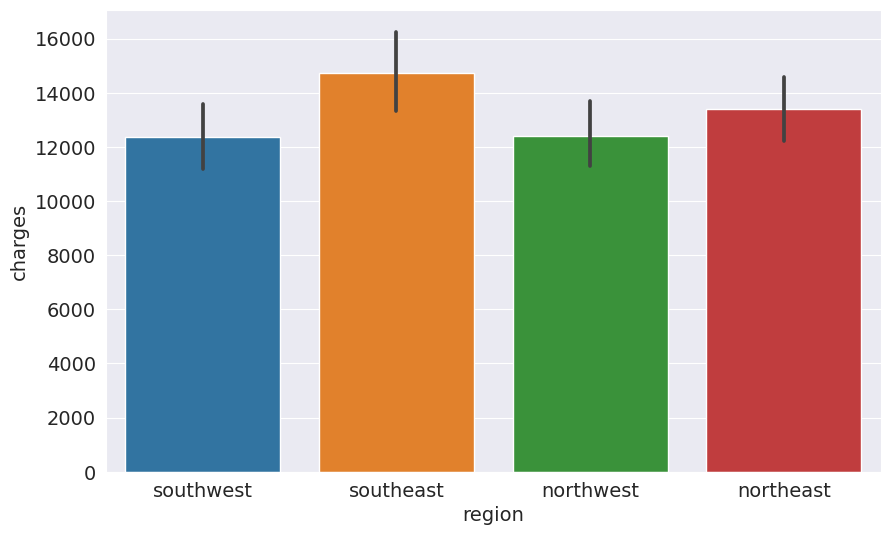

In [ ]:
sns.barplot(medical_df, x = 'region', y = 'charges')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

In [ ]:
ohe.fit(medical_df[['region']])
ohe.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
onehot = ohe.transform(medical_df[['region']]).toarray()

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = onehot

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [ ]:
X = medical_df[['age', 'bmi','sex_code', 'children', 'smoker_code','northeast', 'northwest', 'southeast', 'southwest']]
y = medical_df['charges']

model = LinearRegression()
model.fit(X,y)

prediction = model.predict(X)
loss = rmse(y, prediction)

print("Loss : ", loss)

Loss :  6041.6796511744515


SyntaxError: invalid syntax (<ipython-input-117-650e70133cef>, line 3)

## Model Improvement

> feature scaling

In [ ]:
model.coef_.shape

(9,)

In [ ]:
model.intercept_

-12525.547811195473

In [ ]:
input_col = ['age', 'bmi','sex_code', 'children', 'smoker_code','northeast', 'northwest', 'southeast', 'southwest']

weights_df = pd.DataFrame({
    'feature' : np.append(input_col, 1),
    'weight' : np.append(model.coef_, model.intercept_)
})

weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,sex_code,-131.314359
3,children,475.500545
4,smoker_code,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_code  1338 non-null   int64  
 8   sex_code     1338 non-null   int64  
 9   northeast    1338 non-null   float64
 10  northwest    1338 non-null   float64
 11  southeast    1338 non-null   float64
 12  southwest    1338 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 136.0+ KB


In [ ]:
# for numerical data

num_col = ['age', 'bmi', 'children']
# num_data = medical_df[num_col].values
scaler = StandardScaler()

In [ ]:
scaler.fit(medical_df[num_col])

StandardScaler()

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler_input = scaler.transform(medical_df[num_col])

In [ ]:
scaler_input

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
# for categorical data

cat_col = ['smoker_code','sex_code','northeast', 'northwest', 'southeast','southwest']
cat_data = medical_df[cat_col].values

In [ ]:
X = np.concatenate((scaler_input, cat_data), axis = 1)
y = medical_df.charges

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(X, y)

LinearRegression()

In [ ]:
prediction = model1.predict(X)

In [ ]:
loss = rmse(y, prediction)
print(loss)

6041.6796511744515


# now we compare the weight in th egiven formula

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [ ]:
weight_df = pd.DataFrame({
    'feature':np.append(num_col+cat_col, 1),
    'weight':np.append(model1.coef_, model1.intercept_)
})

weight_df.sort_values('weight', ascending = False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:
## creating the test set by sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
predict_test = regressor.predict(X_test)

In [ ]:
loss = rmse(y_test, predict_test)

In [ ]:
print('Loss: ', loss)

Loss:  6200.590542169907


In [ ]:
predict_train = regressor.predict(X_train)

In [ ]:
loss = rmse(y_train, predict_train)

In [ ]:
print("Loss: ", loss)

Loss:  6028.192539035401


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
score = r2_score(y_test, predict_test)

In [ ]:
score

0.7305711959227877

## Ridge and Lasso regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridge = Ridge()
ridgecv = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 10)

In [ ]:
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_pred = ridgecv.predict(X_test)

In [ ]:
score = r2_score(y_test, ridge_pred)

In [ ]:
print('Score : ', score)

Score :  0.7299648116974907


In [ ]:
ridgecv.best_params_

{'alpha': 1}

In [ ]:
ridgecv.best_score_

-37129737.66512683

In [ ]:
# For Lasso
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lasso = Lasso()
lassocv = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 10)

In [ ]:
lassocv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_pred = lassocv.predict(X_test)

In [ ]:
score = r2_score(y_test, lasso_pred)

In [ ]:
print('Score : ', score)

Score :  0.7268351904244972


In [ ]:
lassocv.best_params_

{'alpha': 90}

In [ ]:

lassocv.best_score_

-37043057.792994246